# Unzip data

In [1]:
import zipfile

with zipfile.ZipFile('./AI_Human.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./AI_Human.csv')

# Import data

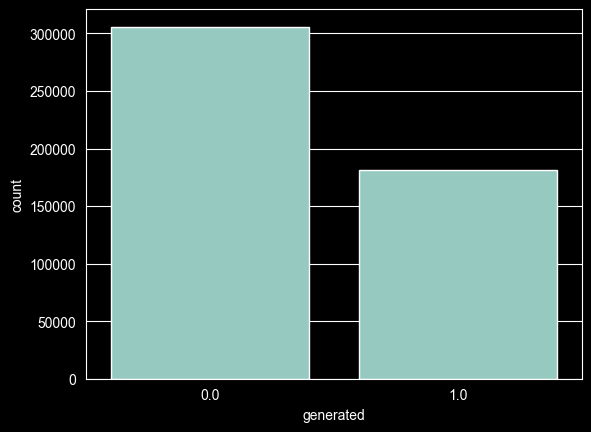

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sb
from utils import TextProcessor

processor = TextProcessor()

training_data = pd.read_csv('./AI_Human.csv/AI_Human.csv')

sb.countplot(data=training_data, x='generated')
plt.savefig('human-vs-ai.png', dpi=300, bbox_inches='tight')

# Clean data

In [2]:
training_data['text'] = training_data['text'].apply(processor.full_clean)

# Test model

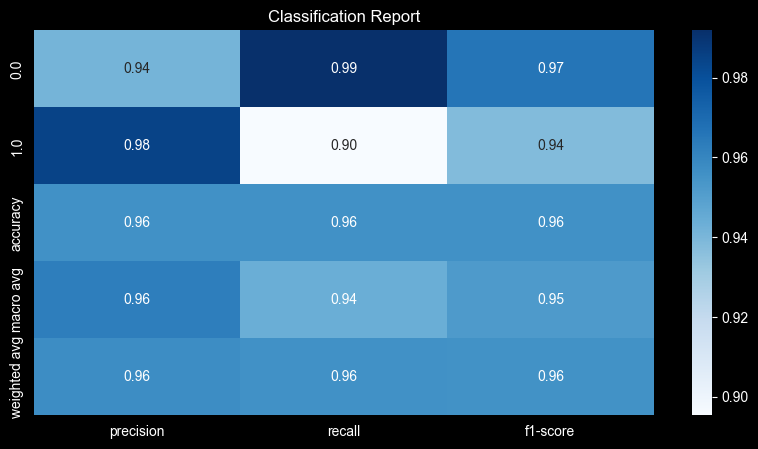

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

y = training_data['generated']
X = training_data['text']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=69)

pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('naive_bayes', MultinomialNB())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy_report = classification_report(y_test,y_pred, output_dict=True)

report_data_frame = pd.DataFrame(accuracy_report).iloc[:-1, :].T

plt.figure(figsize=(10,5))
sb.heatmap(report_data_frame, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report')
plt.savefig('classification-report.png', dpi=300, bbox_inches='tight')

plt.show()

# Save model

In [6]:
import joblib

pipeline.fit(X, y)

joblib.dump(pipeline, 'ai-text-detector-model.pkl')

['ai-text-detector-model.pkl']